Data Sales_Analysis Project

merging all sales data into a single dataset.

In [ ]:
import pandas as pd
see = pd.read_csv('/content/drive/MyDrive/data/Sales_November_2019.csv')
see.head(10)

In [ ]:
#merging the different months intona single file
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/data/Sales_April_2019.csv')
df2 =pd.read_csv('/content/drive/MyDrive/data/Sales_August_2019.csv')
df3 = pd.read_csv('/content/drive/MyDrive/data/Sales_December_2019.csv')
df4 = pd.read_csv('/content/drive/MyDrive/data/Sales_February_2019.csv')
df5 = pd.read_csv('/content/drive/MyDrive/data/Sales_January_2019.csv')
df6 = pd.read_csv('/content/drive/MyDrive/data/Sales_January_2019.csv')
df7 = pd.read_csv('/content/drive/MyDrive/data/Sales_July_2019.csv')
df8 = pd.read_csv('/content/drive/MyDrive/data/Sales_March_2019.csv')
df9 = pd.read_csv('/content/drive/MyDrive/data/Sales_May_2019.csv')
df10 = pd.read_csv('/content/drive/MyDrive/data/Sales_November_2019.csv')
df11 = pd.read_csv('/content/drive/MyDrive/data/Sales_October_2019.csv')
df12 = pd.read_csv('/content/drive/MyDrive/data/Sales_September_2019.csv')

df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index= True) #can use the .merge method
df.head()

In [ ]:
df.info()

In [ ]:
#printing out each file that was merged
import pandas as pd
import os

files= [file for file in os.listdir('/content/drive/MyDrive/data')]


for file in files:
  print(file)

alternative to merging files using iteration.

In [ ]:
#alternative for the merge(easier and faster)
import pandas as pd
import os

files =[ file for file in os.listdir('/content/drive/MyDrive/data')]

all_months_info = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/MyDrive/data/'+file)
  all_months_info = pd.concat([all_months_info, df])

all_months_info.head()



In [ ]:
#reading as a csv file
import pandas as pd
import csv
all_months_info.to_csv('myMonths.csv', index= False)
df = csv.reader('myMonths.csv')
print(df)
#print('myMonths.csv')
all_mon = pd.read_csv('myMonths.csv')


In [ ]:
# getting an overview of the dataset
import pandas as pd
all_mon



new task...### what was the best month for sales.

# Data cleaning


In [ ]:
import pandas as pd
all_mon['Price Each'].info()

In [ ]:
#checking for deplicated values in dataset
all_mon.duplicated()

In [ ]:
#printing out the rows with NaN values
nan = all_mon[all_mon.isna().any(axis=1)]
nan.tail()



In [ ]:
#dropping all months with NaN values
all_mon = all_mon.dropna(how ='all')
all_mon.head()

In [ ]:
all_mon.isnull()     #checking if all null values were dropped.

# TASK 1
which month was the best in terms of sales


In [ ]:
#adding a new column named Month
all_mon['Month']= all_mon['Order Date'].str[0:2]
all_mon.head(10)
#all_mon.tail()

In [ ]:
all_mon.Month.unique()    #there is 'or' and 'nan' values which have to be dropped

In [ ]:
#printing the values with 'or'
temp =all_mon[all_mon['Order Date'].str[0:2] =='Or']
temp.head()

In [ ]:
#seting the all_mon data to have values without 'Or' in month
all_mon = all_mon[all_mon['Month'] !='Or']
all_mon

In [ ]:
all_mon

In [ ]:
all_mon.info()

In [20]:
all_mon.dropna(inplace=True)  #initially in the dropna above,implace was not specified hence nan values still persist.

In [ ]:
all_mon['Quantity Ordered'].unique()

In [ ]:
all_mon['Price Each'] == pd.to_numeric(all_mon['Price Each'],errors='raise') #the to_numeric could not convert the object type to int or float
all_mon['Quantity Ordered'] == pd.to_numeric(all_mon['Quantity Ordered'],errors='raise')

In [ ]:
all_mon['Quantity Ordered'].unique()

In [ ]:
all_mon['Price Each'].unique()

In [25]:
all_mon['Price Each'] = all_mon['Price Each'].str.strip('').astype(float)  #converting from object datatype to a float by stripping the ''

In [26]:
all_mon['Quantity Ordered'] = all_mon['Quantity Ordered'].str.strip('').astype(int)   #converting from object datatype to an int
#all_mon['Quantity Ordered'] = all_mon['Quantity Ordered'].astype(int).str.replace('1',1)


In [27]:
#creating  new column for sales
all_mon['Sales'] = (all_mon['Price Each'] * all_mon['Quantity Ordered'])

In [ ]:
all_mon

#### task1 which month was best for sales

In [ ]:
## Make a visual for all 12 month
now = all_mon.groupby('Month').sum()
now

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,now['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(months)
#plt.yticks('Sales)
plt.title('A graph of Sales against Month')

plt.show

#### We can conclude that December had the most Sales

# another task is to change the month names from numbers.

##TASK 2
#which city has the best sales?

In [ ]:
all_mon.groupby('Purchase Address').sum()

In [32]:
#extracting the city from the Purshase Address col.
###all_mon['City'] = all_mon['Purchase Address'].apply(lambda x: x.split(',')[1])
##all_mon['City'] = all_mon['Purchase Address'].apply(lambda x: x.split(' ')[5])
#Can't find a way to add this two
#try a function
def city(address):
  return address.split(',')[1]

def city1(address):
  return address.split(' ')[4]

all_mon['City'] = all_mon['Purchase Address'].apply(lambda x: f'{city(x)} ({city1(x)})')




In [ ]:
ci = all_mon.groupby('City').sum()

In [ ]:
#how many citiess are there
all_mon['City'].unique()

In [ ]:
# plotting a graph of cities agaisnt sales
import matplotlib.pyplot as plt
#City = all_mon['City'].unique()-----  #this gives a mismatch wiht the y vales

Cities = [city for city, df in all_mon.groupby('City')]    # for x and y values to be in the order

plt.bar(Cities,ci['Sales'], color = 'green')
plt.xticks(Cities, rotation = 'vertical')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('A graph of cities agaisnt sales')


#which item was most purchased

#TASK 3
##which time should we display advertisemests to maximise likelihood of customers buying product.

In [ ]:
all_mon['Order Date']

In [ ]:
##creating a column for time
all_mon['Time'] = all_mon['Order Date'].str[9:14]
all_mon

In [ ]:
all_mon['Time'].mode()  #time defer also in seconds,the mode might not be the most most appropiate methid to use for this task

In [ ]:
#which city had the best number of sales
all_mon['Purchase Address'].nunique()

In [ ]:
all_mon['Time'].value_counts().nlargest(3)

###the purchase times are in the 24hour format.(11:58) and (19:20,15)were the most occuring times; meaning the best hours for advertisement should be around 11 or 7.

#use a graph


using another approach to check if th answer is the valid

In [ ]:
#change type from object to datetime
all_mon['Order Date'] = pd.to_datetime(all_mon['Order Date'])
all_mon.head()


In [ ]:
#creating another column for Hour
all_mon['Hour'] = all_mon['Order Date'].dt.hour
all_mon.head()

In [ ]:
#plot a diferrnt hours
hours = [hour for hour,df in all_mon.groupby('Hour')]
plt.plot(hours,all_mon.groupby('Hour').count())
plt.grid()
plt.xticks(hours)
plt.show()


### Also from the visual,between 11 and 12 and and 19 were perk, indicating the best time for advertisement.

In [44]:
del all_mon['Order ID']

In [ ]:
all_mon['Product'].mode()

##TASK 4
###what was the best products(in terms of sales)

In [ ]:
pro =  all_mon.groupby('Product').sum()
pro

In [ ]:
import matplotlib.pyplot as plt
pro1 = [product for product, df in all_mon.groupby('Product')]
plt.bar(pro1, pro['Sales'])
plt.xticks(pro1,rotation ='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show

###from the analysis made the product thatgave much sales was the Macbook Pro Laptop

In [ ]:
all_mon.groupby(['Product','Month']).sum()

In [ ]:
# #changing the months names from numbers to words
#import calendar as c
# def get_mon(x):
#   for x in all_mon['Month']:
#     this = c.month_name[int(x)]
#     return this
# get_mon(5)
# all_mon['Month names'] = all_mon['Month'].apply(lambda x: get_mon(x))
#all_mon['Month name'] = all_mon['Month'].apply(lambda x: c.month_abbr[x])
all_mon['Month name'] = all_mon['Month']


#The product that was purchased the most

In [ ]:
pro2 =  all_mon.groupby('Product').sum()
pro2

<function matplotlib.pyplot.show(close=None, block=None)>

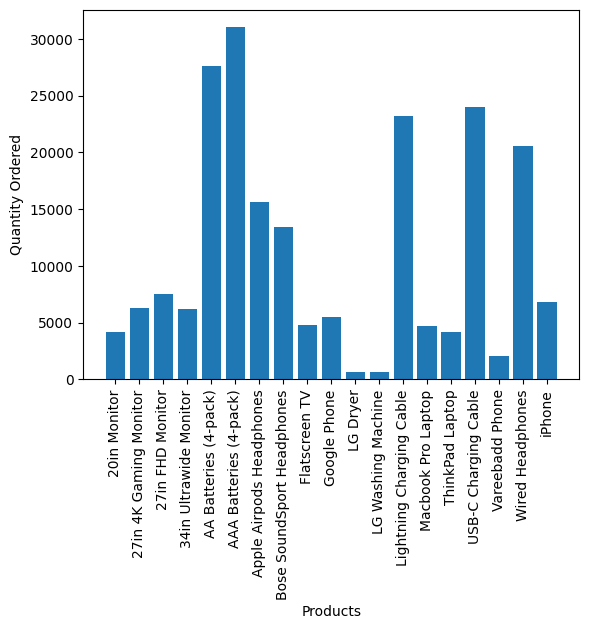

In [59]:
import matplotlib.pyplot as plt
pro3 = [product for product, df in all_mon.groupby('Product')]
plt.bar(pro3, pro2['Quantity Ordered'])
plt.xticks(pro3, rotation ='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show